<h1 style='font-size:40px'> Deep Computer Vision Using Convolutional Neural Networks</h1>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Aprenderemos aqui a natureza das Convolutional Neural Networks (CNN's), extremamente usadas no campo de detecção de imagens. 
        </li>
        <li> 
            Essas mesmas redes também podem ser usadas em NLP e reconhecimento de fala.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> The Architecture of the Visual Cortex</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            As CNN's têm a sua estrutura inspirada no córtex visual. Em estudos, foi constatado que cada neurônio visual é acionado quando há estímulo em uma área específica do espaço - os receptive fields.
        </li>
        <li> 
            Além disso, certos neurônios são incitados com estímulos mais complexos provenientes de receptive fields maiores. Isso levou à ideia de que células nervosas de maior nível são abastecidas por reações de outras de mais baixo nível.
        </li>
        <li> 
            É importante ressaltar que as CNN's possuem camadas parcialmente conectadas, pois imagens costumam ter dimensões maiores do que dados planilhados. Uma fully-conected network requeriaria, portanto, uma quantidade imensa de parâmetros, consumindo muita memória.
        </li>
    </ul>
</div>

<h2 style='font-size:30px'> Convolutional Layers</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            As CNN's têm como seu principal componente as Camadas Convolucionais. Os neurônios dessas não se conectam com todos os outputs da camada anterior, sendo uma tentativa de mimetizar um receptive field. O tamanho desse pode ser livremente escolhido.
        </li>
        <li> 
            Cabe destacar que as camadas de CNN's são em duas - ou três - dimensões, diferentemente das redes vistas até então.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Propriedades das Computações</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Para garantir que a próxima camada tenha o mesmo formato de sua precedente, preenchemos as bordas desta com 0's.
         </li>
    </ul>
</div>

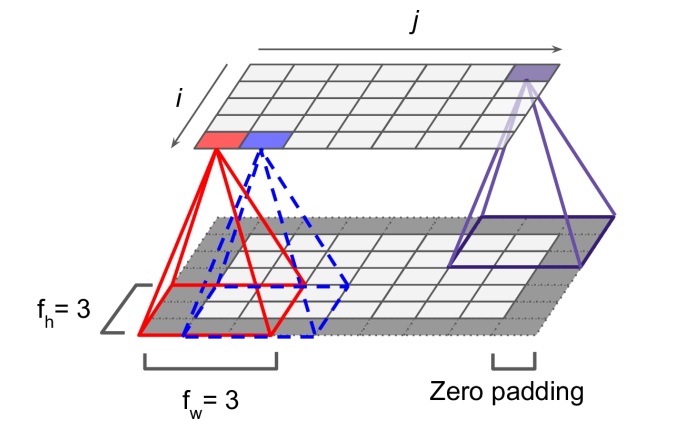

<div> 
    <ul style='font-size:20px;margin-bottom:0px'>
        <li> 
            A fim de reduzirmos a dimensão da camada de output, podemos definir um tamanho maior da passada - stride - de um campo receptivo para outro. Conseguimos escolher o stride vertical e horizontal.
         </li>
    </ul>
</div>

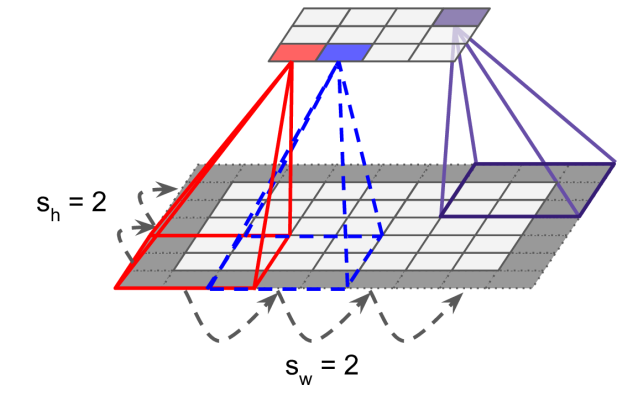

<h3 style='font-size:30px;font-style:italic'> Filters</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Os filtros são as matrizes-kernel que farão a convolução da imagem. Os principais filters são matrizes quadradas com linha ou coluna central de 1's, com o restante de sua estrutura com 0's.
         </li>
        <li> 
            O output de uma camada que usa o mesmo filtro nas convoluções é conhecido como feature map.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> Stacking Multiple Feature Maps</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            A partir do momento que lidamos com imagens de múltiplos canais (RGB, por exemplo), a natureza das convoluções se altera. Quando desejamos fazer essa operação, devemos recorrer a um kernel também 3-D de mesma profundidade.  
        </li>
        <li> 
            Nós, novamente, multiplicaremos os elementos por posição para somar todos os produtos, mas agora considerando a terceira dimensão. 
        </li>
    </ul>
</div>

<center> 
    <h1> Exemplo de Convolução (Múltiplos Canais)</h1>
</center>

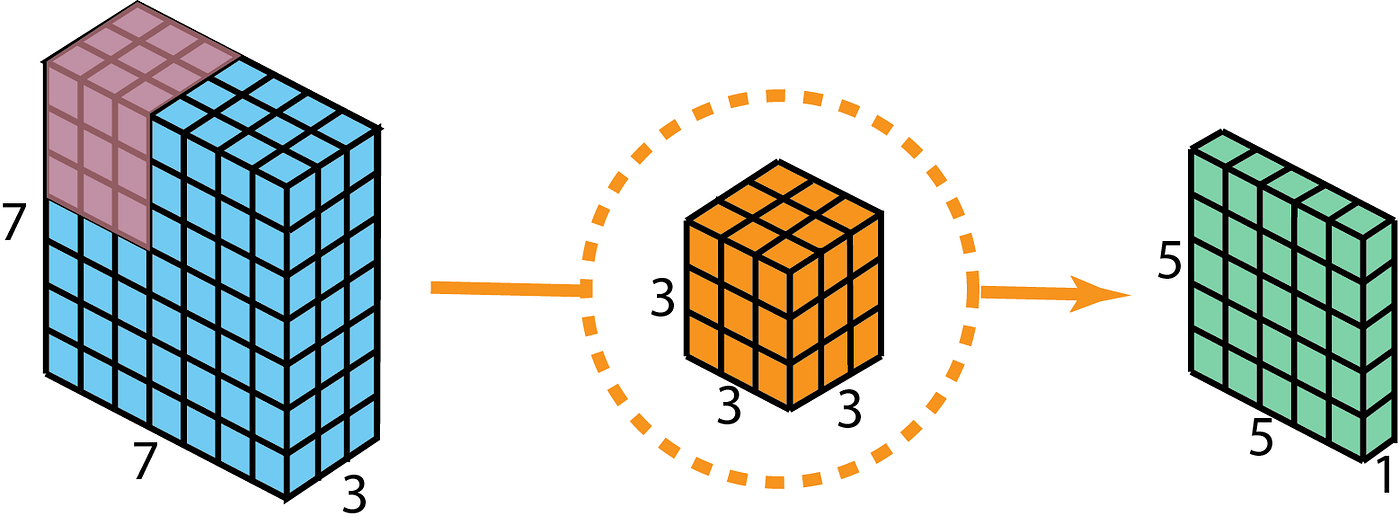

<div> 
    <ul style='font-size:20px'>
        <li> 
            Como as profundidades das matrizes são as mesmas, não podemos deslizar o kernel para frente e trás, fazendo com que o feature map computado seja 2-D. Mas ressalto que isso não é necessariamente uma condição obrigatória para a operação ocorrer.
        </li>
        <li> 
            Esse mesmo cálculo será feito quando tivermos vários feature maps - gerados por uma camada convolucional anterior. Nesse caso, nós os empilhamos e fazemos a convolução com um kernel $K_{(height, width, feature maps)}$.
        </li>
    </ul>
</div>

<h1> Equação da Convolução 3-D</h1>

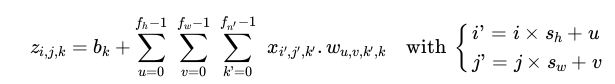

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_sample_image

flower = load_sample_image('flower.jpg')#load_sample_images()['images'][0].shape
vertical = tf.Variable(tf.zeros(shape=(7, 7, 3), dtype=tf.uint8))
vertical[:, 3, :].assign(1)

# Tentativa de programar uma convolução...
def conv(image:tf.Tensor, kernel:tf.Tensor, hstrides:int=1, wstrides:int=1)->tf.Tensor:
    kernel_shape, image_shape = kernel.shape, image.shape # Armazendo os shapes das matrizes.
    assert image_shape[2] == kernel_shape[2], 'O kernel deve ter mesma profundidade que a matriz' # Verificando a validez da convolução.
    
    # Tensor de output.
    output_h = (image_shape[0] - kernel_shape[0])//hstrides + 1
    output_w = (image_shape[1] - kernel_shape[1])//wstrides + 1
    output = np.empty((output_h, output_w))
    for i in range(kernel_shape[0], image_shape[0]+1, hstrides):
        for j in range(kernel_shape[1], image_shape[1]+1, wstrides):
            output[(i-kernel_shape[0])//hstrides, (j-kernel_shape[1])//wstrides] = tf.reduce_sum(kernel * 
                                                                                image[i-kernel_shape[0]:i, j-kernel_shape[1]:j, :])
    return output
# Consertar iteração.
#convoluted = conv(flower, vertical)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<h3 style='font-size:30px;font-style:italic'> TensorFlow Implementation</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Faremos aqui uma Convolução com duas imagens amostrais dentro do TensorFlow.
        </li>
        <li> 
            Na framework, uma imagem é tida como uma matriz de formato $[n_{\text{batches}}, \text{height}, \text{width}, n_\text{channels}]$. Já a matriz de weights, $[\text{height}, \text{width},  n_\text{channels}, n_{\text{filters}}]$
        </li>
    </ul>
</div>

In [2]:
# O método `load_sample_image` nos oferece duas fotos. Uma de um templo chinês, outra de uma flor.
from sklearn.datasets import load_sample_images
import numpy as np
import tensorflow as tf

# Carregando as fotografias.
images = tf.Variable(load_sample_images()['images'])
batch_size, height, width, channels = images.shape # Extraindo os valores de cada dimensão.

In [3]:
n_filters = 2 # Faremos as convoluções com 2 filtros.

# Matriz de filtros.
filters = tf.Variable(tf.zeros((7, 7, channels, n_filters), dtype=tf.int32))
filters[3, :, :, 0].assign(1) # Filtro horizontal.
filters[:, 3, :, 1].assign(1) # Filtro vertical.

# Fazendo as convoluções.
outputs = tf.nn.conv2d(input=images, filters=filters, strides=1, padding='SAME', )

output_valid = tf.nn.conv2d(input=images, filters=filters, strides=1, padding='VALID', )
# Nota: `conv2d` admiite apenas inputs integers.

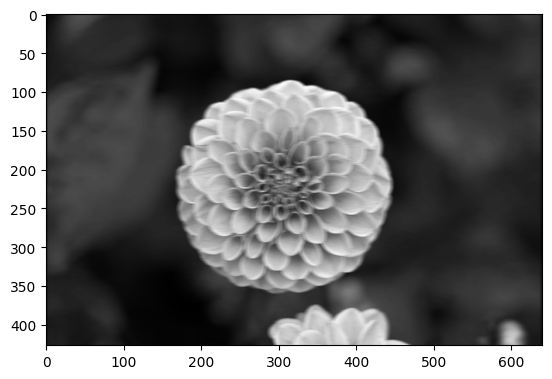

In [4]:
import matplotlib.pyplot as plt

plt.imshow(outputs[1, :, :, 0], cmap='gray')

<h4 style='font-size:30px;font-style:italic;text-decoration:underline'> padding</h4>
<div> 
    <ul style='font-size:20px'>
        <li> 
            O argumento 'padding' sinaliza se usaremos zero-padding em nossa matriz ou não. Caso passemos "SAME", acrescentaremos zeros nas extremidades da dimensão, garantindo que o kernel tenha se sobreposto a todos os pixels possíveis, sem truncamento. Se usarmos "VALID", não ha acréscimo de zeros e alguns pixels podem ser negligenciados devido ao truncamento do kernel.
        </li>
    </ul>
</div>

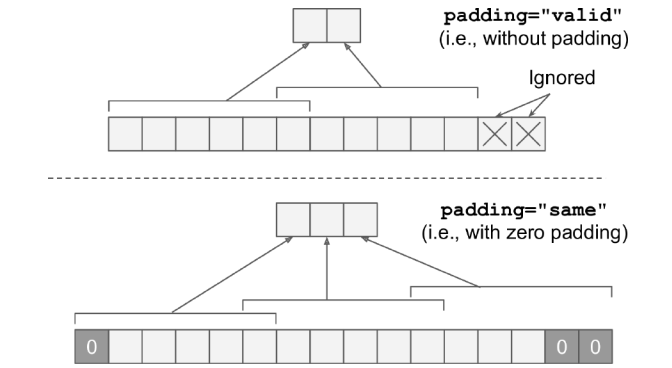

In [5]:
# A função com a qual trabalhamos exige que criemos nossos próprios filtros.
# Mas, no contexto da modelagem, eles seriam matrizes inicializadas automaticamente.
import tensorflow.keras as keras

# A `Conv2D` é a camada responsável pelas convoluções de uma CNN
conv = keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding='same',
                          activation='relu')

# Realizando a convolução.
conv(tf.cast(images, tf.float32))[0][0]

<tf.Tensor: shape=(640, 10), dtype=float32, numpy=
array([[  0.       ,   0.       , 128.93764  , ...,  87.28156  ,
         60.756393 ,   0.       ],
       [  8.804193 ,   0.       , 179.07225  , ..., 155.11307  ,
        156.14786  ,   0.       ],
       [  8.863588 ,   0.       , 179.47269  , ..., 155.05263  ,
        156.08524  ,   0.       ],
       ...,
       [ 18.659725 ,   0.       , 233.0174   , ..., 191.62267  ,
        183.11937  ,   0.       ],
       [ 19.406048 ,   0.       , 233.31659  , ..., 191.7692   ,
        183.71072  ,   0.       ],
       [ 71.85645  ,   0.       , 212.92058  , ..., 115.29058  ,
        209.95013  ,   2.4763396]], dtype=float32)>

<h3 style='font-size:30px;font-style:italic'> Memory Requirements</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            O autor expõe a grande demanda por memória das camadas convolucionais. Caso venha a ter problema de falta de RAM, use batches menores; recorra a data types float16; ou, em última instância, remova algumas camadas do modelo.
         </li>
    </ul>
</div>

<h2 style='font-size:30px'> Pooling Layers</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            As Pooling Layers têm funcionamento bastante similar ao das convolucionais. Elas também enquadram uma porção do input, mas computam uma operação de agregação sobre os pixels - média, ou máximo. Esse número é o resultado da operação para a parcela da imagem em questão.
        </li>
        <li> 
            A meta é diminuir o tamanho da matriz, poupando processamento e memória. Como a quantidade de coeficientes também cai, elas têm uma certa capacidade de regularização.
        </li>
        <li> 
            A operação é feita em cada canal da matriz. Portanto o output manterá a mesma profundidade.
        </li>
    </ul>
</div>

In [6]:
# Veja que as mesmas configurações das Conv estão presentes nas camadas de Pooling.
pool2d = keras.layers.MaxPool2D(pool_size=(2,2), strides=2, padding='valid')(images)

<h3 style='font-size:30px;font-style:italic'> Invariância  de Tradução</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Uma outra vantagem das camadas de Pooling é o oferecimento de traduções invariáveis. Isso quer dizer que um determinado padrão presente em diferentes lugares das fotografias pode ser denunciado no resultado do Pooling.
         </li>
        <li> 
            Observe na imagem abaixo que o output de A e B é igual mesmo com o 8 sendo deslocado. 
        </li>
    </ul>
</div>

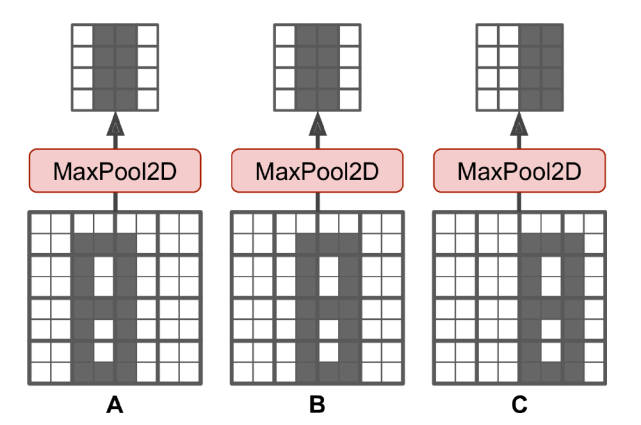

<h3 style='font-size:30px;font-style:italic'> TensorFlow Implementation</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            A aplicação é bastante simples, uma vez que cada tipo de Pooling tem a sua classe no módulo `keras.layers`.
        </li>
        <li> 
            O autor adverte que o Max Pooling costuma dar resultados melhores do que o Average Pooling, além de oferecer uma invariância de traduções mais forte.
        </li>
    </ul>
</div>

In [7]:
# Um breve exemplo do uma Max Pooling.
keras.layers.MaxPool2D(pool_size=2)

# `MaxPooling2D` faz tambem a mesma operação; é apenas um alias.
keras.layers.MaxPooling2D()

In [8]:
# É apresentada também a possibilidade de realizarmos Poolings ao longo da profundidade da matriz.
# Como as classes prontas não possibilitam isso, temos que usar as camadas `Lambda` juntamente com os métodos do módulo `tf.nn`.
keras.layers.Lambda(lambda X: tf.nn.max_pool2d(X, ksize=(1,1,1,3)))

In [9]:
# Por último, somos apresentados aos Pooling Globais, que computam a operação de agregação sobre todo o feature map, ao invés de em partes dele.
keras.layers.GlobalAvgPool2D()(images)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[144, 145, 140],
       [ 55,  73,  57]], dtype=int32)>

<h2 style='font-size:30px'> CNN Architectures</h2>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Aprenderemos aqui diversas arquiteturas de CNN conhecidas pelo seu sucesso em competições de ML. 
        </li>
        <li> 
            Mas antes, Géron providencia algumas dicas: prefira usar vários kernels pequenos do que um único grande. Isso requer menos computações e costuma dar resultados melhores.
        </li>
        <li> 
            A cada Pooling feito, recomenda-se dobrar o número de kernels da próxima camada convolucional. Isso porque as dimensões costumam perder metade de suas dimensões.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> LeNet-5</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            Criada em 1998 por Yann LeCun. Possui a seguinte composição:
        </li>
    </ul>
</div>

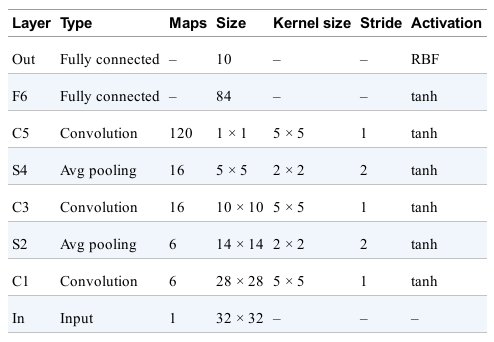

<div> 
    <ul style='font-size:20px'>
        <li> 
            Vale notar que a rede tem algumas particularidades: seus inputs são escalados de -1 a 1 (segundo um paper de LeCun).
        </li>
        <li> 
            Além disso, a função de ativação da camada final lança o quadrado da distância Euclidiana entre o vetor de pixels e o de coeficientes ($||X-w||_{2}^{2}$). No entanto, alguns cientistas se sentem à vontade de usar a softmax mesmo.
        </li>
    </ul>
</div>

<h3 style='font-size:30px;font-style:italic'> AlexNet</h3>
<div> 
    <ul style='font-size:20px'>
        <li> 
            É a primeira CNN bem sucedida a realizar convoluções em sequência, não tendo um Pooling intermediário. 
        </li>
    </ul>
</div>

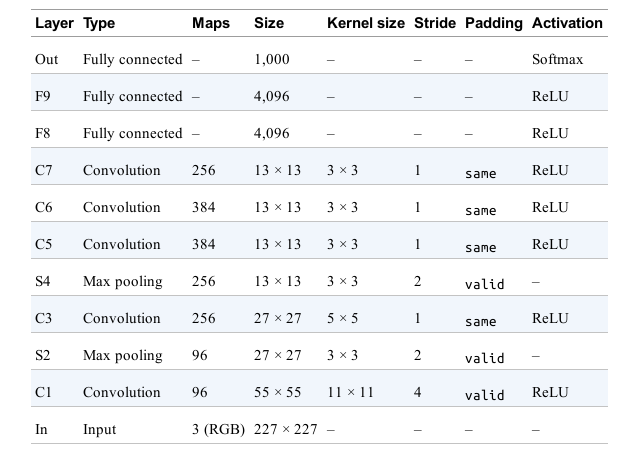

<div> 
    <ul style='font-size:20px'>
        <li> 
            Essa rede usa duas técnicas de regularização: Dropout (rate=50%) entre F8 e F9 e Data Augmentation.
        </li>
        <li> 
            o
        </li>
    </ul>
</div>

<p style='color:red'> Explicar Local Response Normalization; depois, Data Augmentation</p>